# Credit Card Fraud Detection

### In this project we analyze a dataset of credit card transactions made over a two-day period in September 2013 by European cardholders. The dataset contains 284,807 transactions, of which 492 (0.17%) are fraudulent.

Each transaction has 30 features, all of which are numerical. The features V1, V2, ..., V28 are the result of a PCA transformation. To protect confidentiality, background information on these features is not available. The Time feature contains the time elapsed since the first transaction, and the Amount feature contains the transaction amount. The response variable, Class, is 1 in the case of fraud, and 0 otherwise.

Our goal in this project is to construct models to predict whether a credit card transaction is fraudulent. We'll attempt a supervised learning approach. We'll also create visualizations to help us understand the structure of the data.

# Getting Started

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('creditcard.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [4]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


### Analysing the dataset

In [5]:
df.Class.value_counts(normalize = True)

0    0.998273
1    0.001727
Name: Class, dtype: float64

In [6]:
df.Class.value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [7]:
### huge imbalanced dataset hence oversampling or undersampling must be done

### let's find the average amount in fraudlent  and non - fraud transaction

In [8]:
fraud = df[df['Class']==1]
fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [9]:
true = df[df['Class']==0]
true.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

### Data Preprocessing

In [10]:
### checking for missing values

df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [11]:
x = df.drop('Class' , axis = 1)
y = df['Class']

### EDA

In [12]:
### Distribution of all numerical variables with respect to fraudlent transaction

len(x.columns)

30

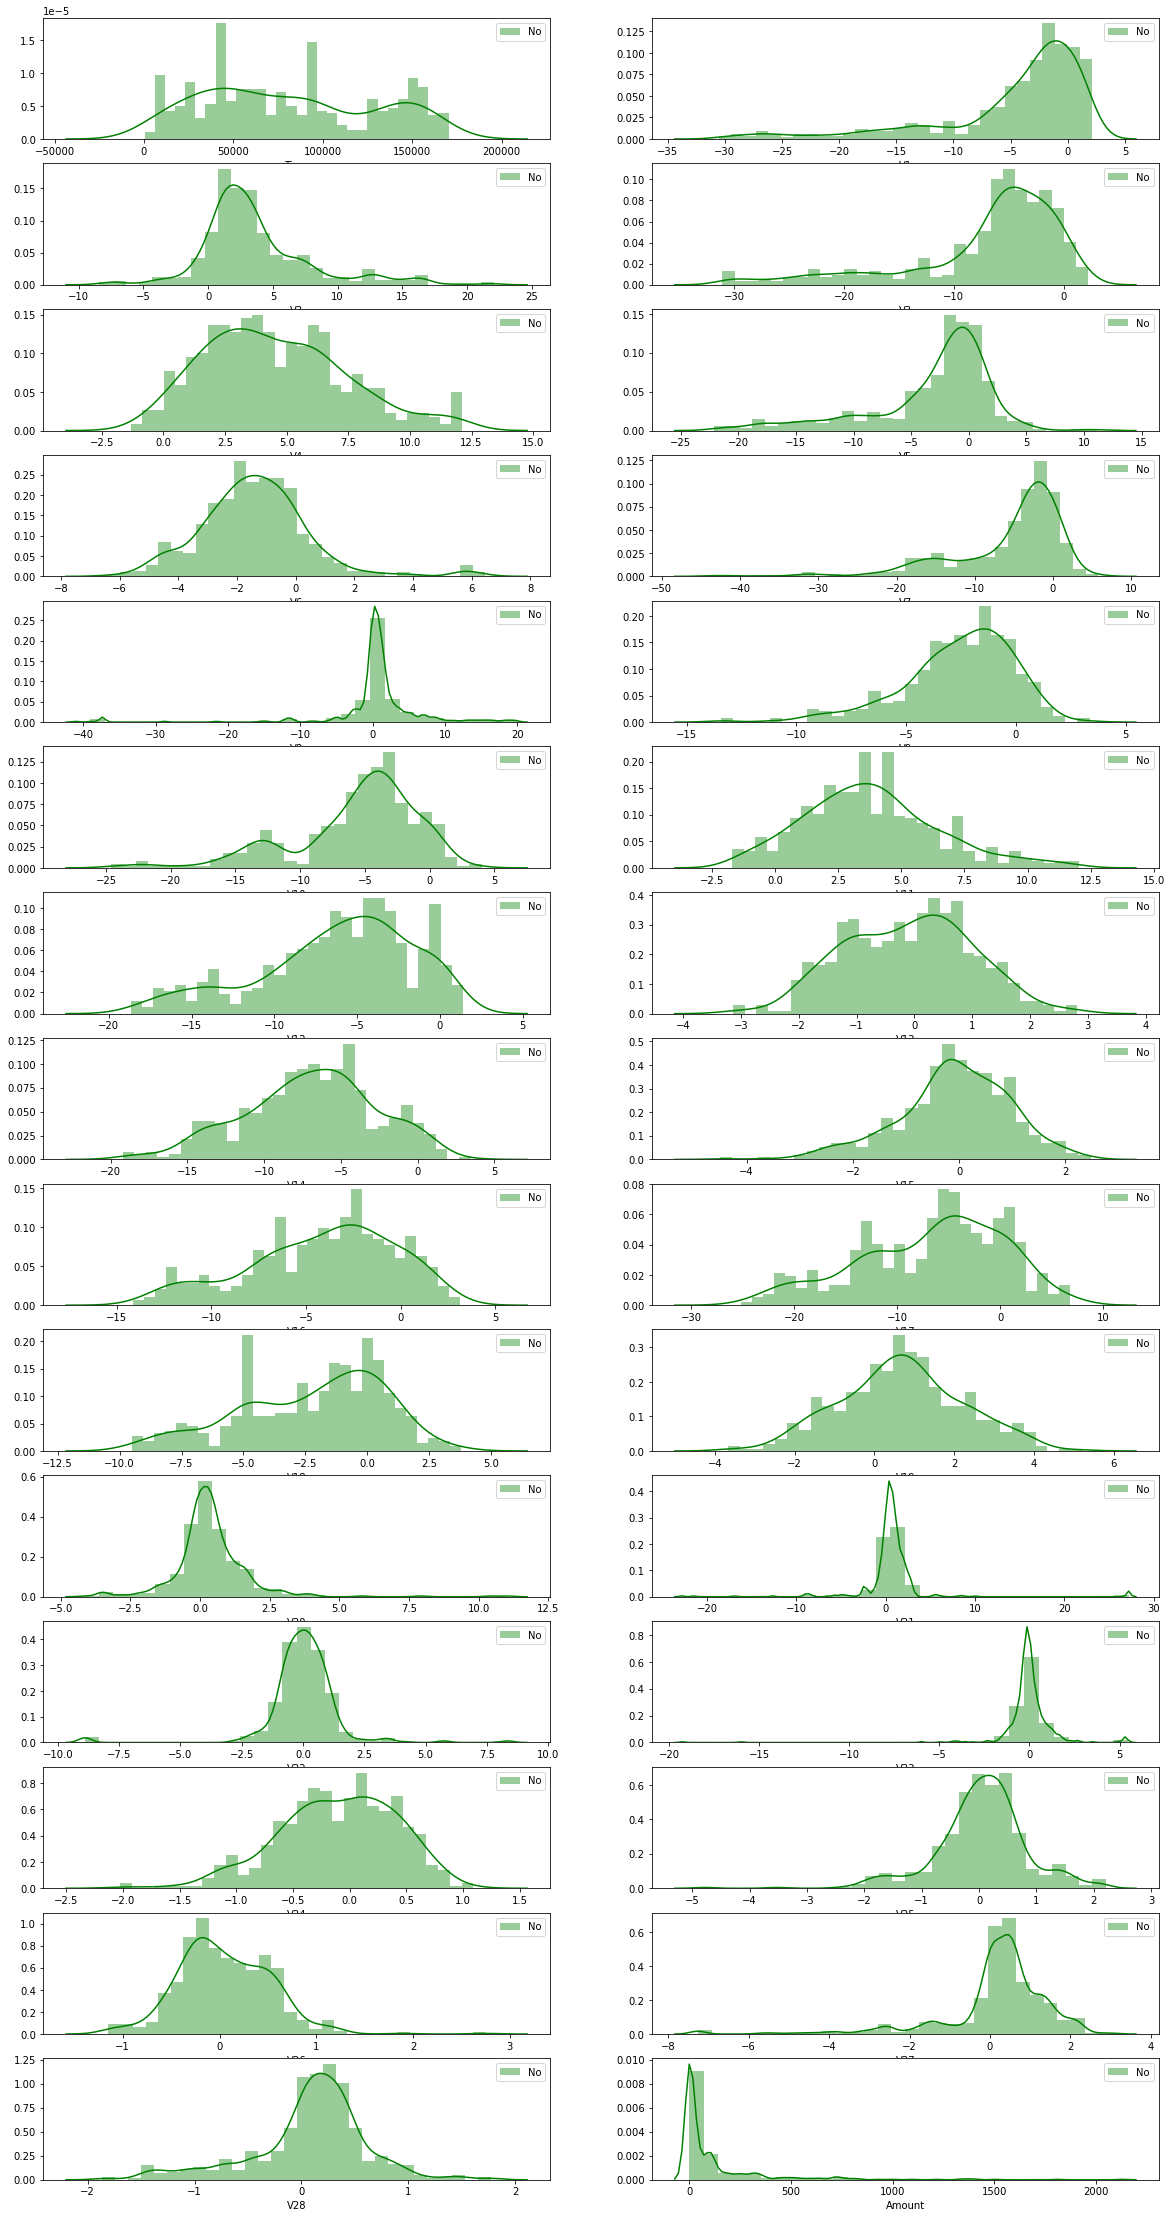

In [13]:
plt.figure(figsize=(20,80))
plotnumber = 1
for i in x:
    ax = plt.subplot(30,2,plotnumber)
    sns.distplot(df[(df['Class']== 1)][i] , bins =30 , label = 'No',color = 'green')
    plt.legend(loc = 'upper right')
    plt.xlabel(i)
    plotnumber+=1
plt.show()

In [14]:
### Distribution of all numerical variables with respect to non-fraudlent transaction

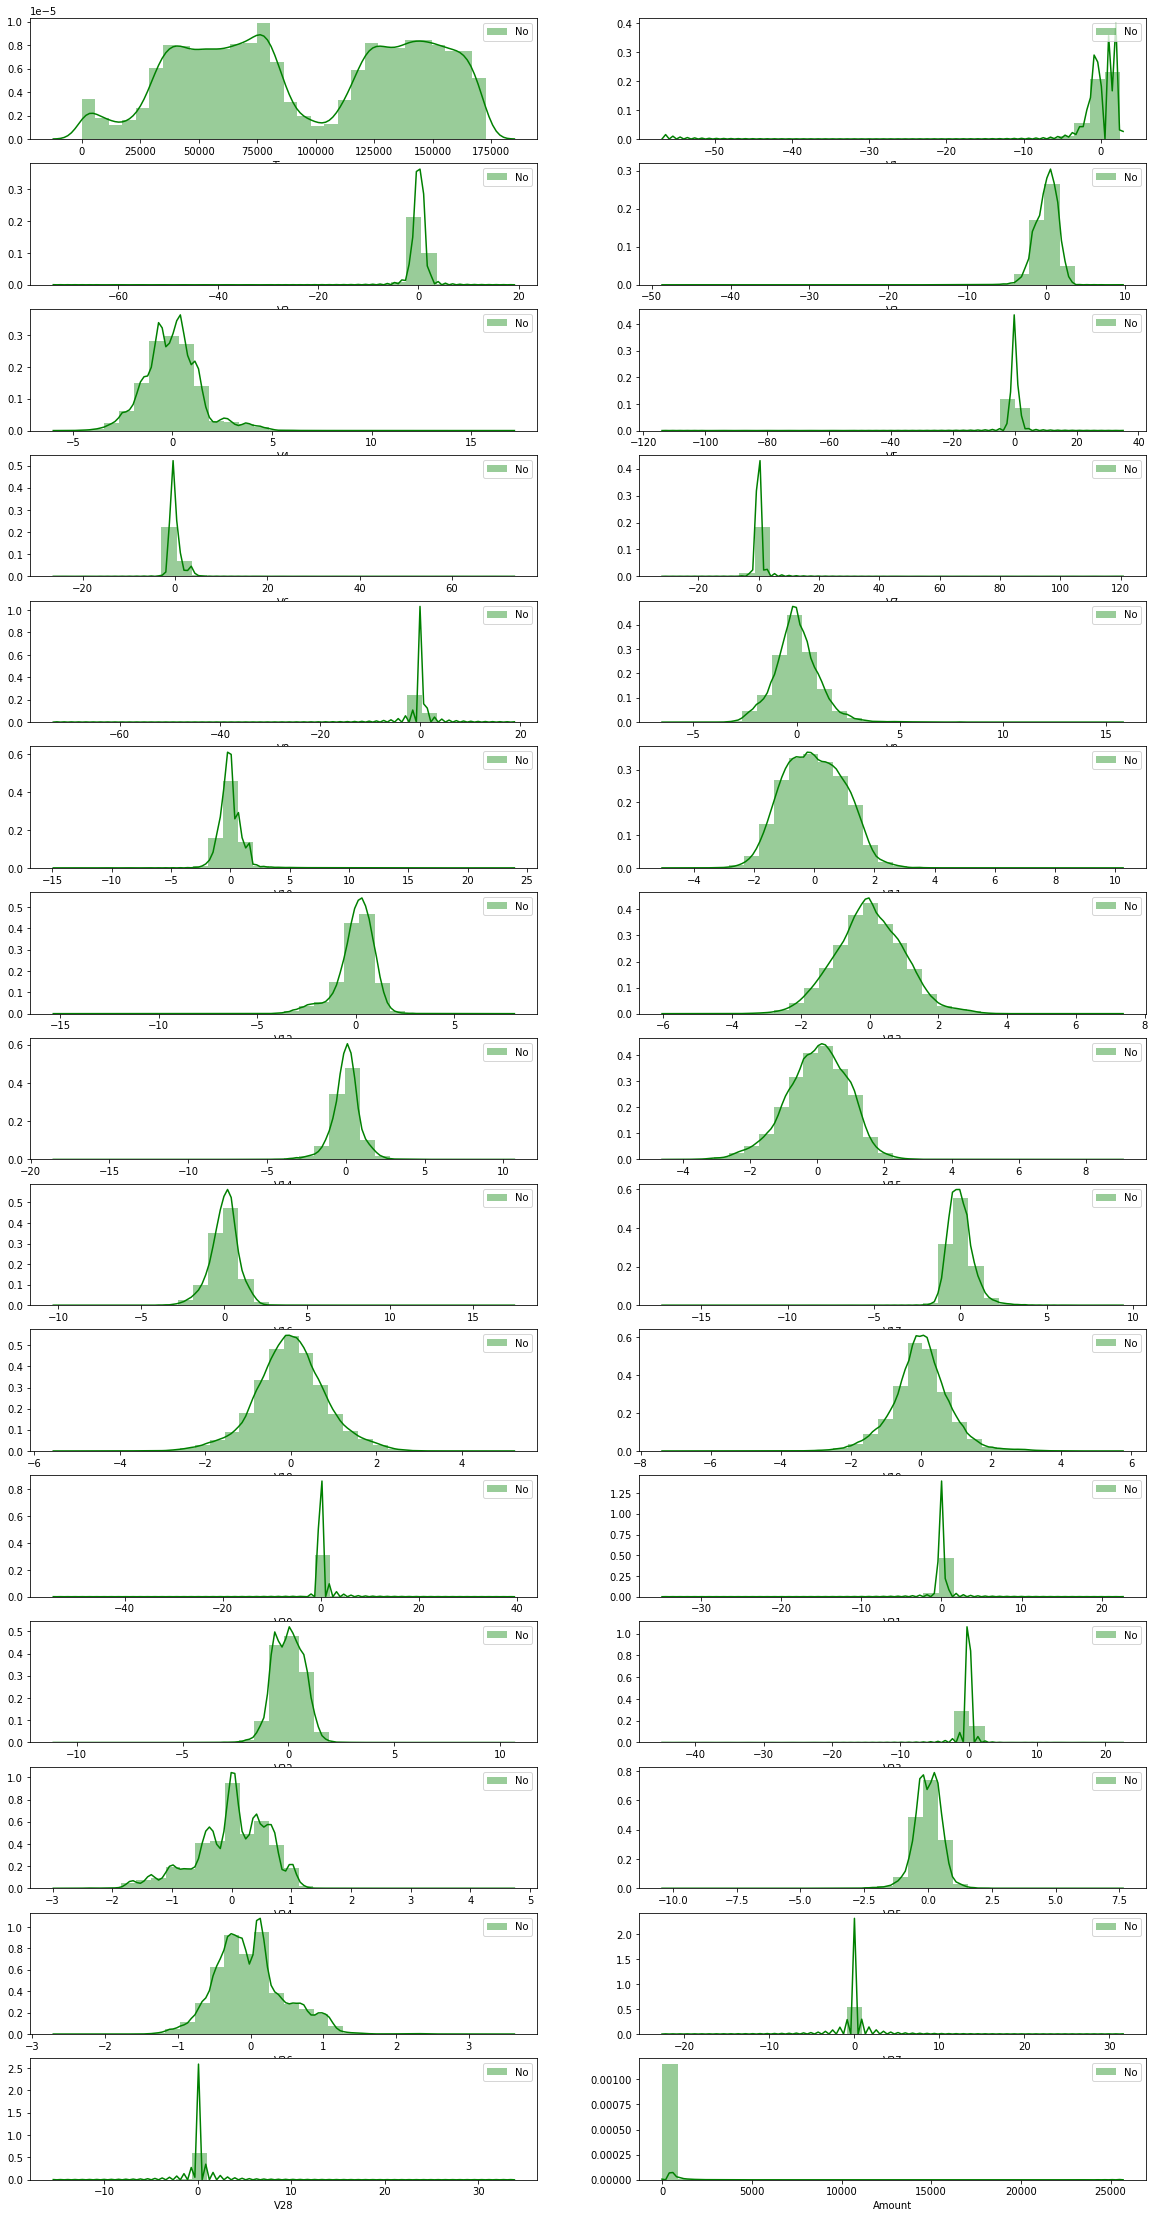

In [15]:
plt.figure(figsize=(20,80))
plotnumber = 1
for i in x:
    ax = plt.subplot(30,2,plotnumber)
    sns.distplot(df[(df['Class']== 0)][i] , bins =30 , label = 'No',color = 'green')
    plt.legend(loc = 'upper right')
    plt.xlabel(i)
    plotnumber+=1
plt.show()

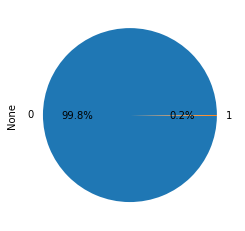

In [16]:
### pie chart
df.groupby('Class').size().plot(kind='pie', autopct='%.1f%%')

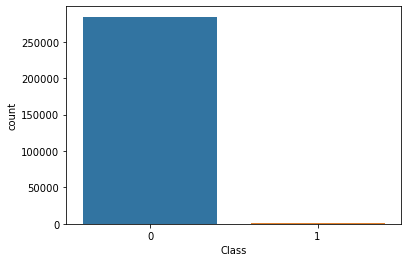

In [17]:
sns.countplot(df['Class'])

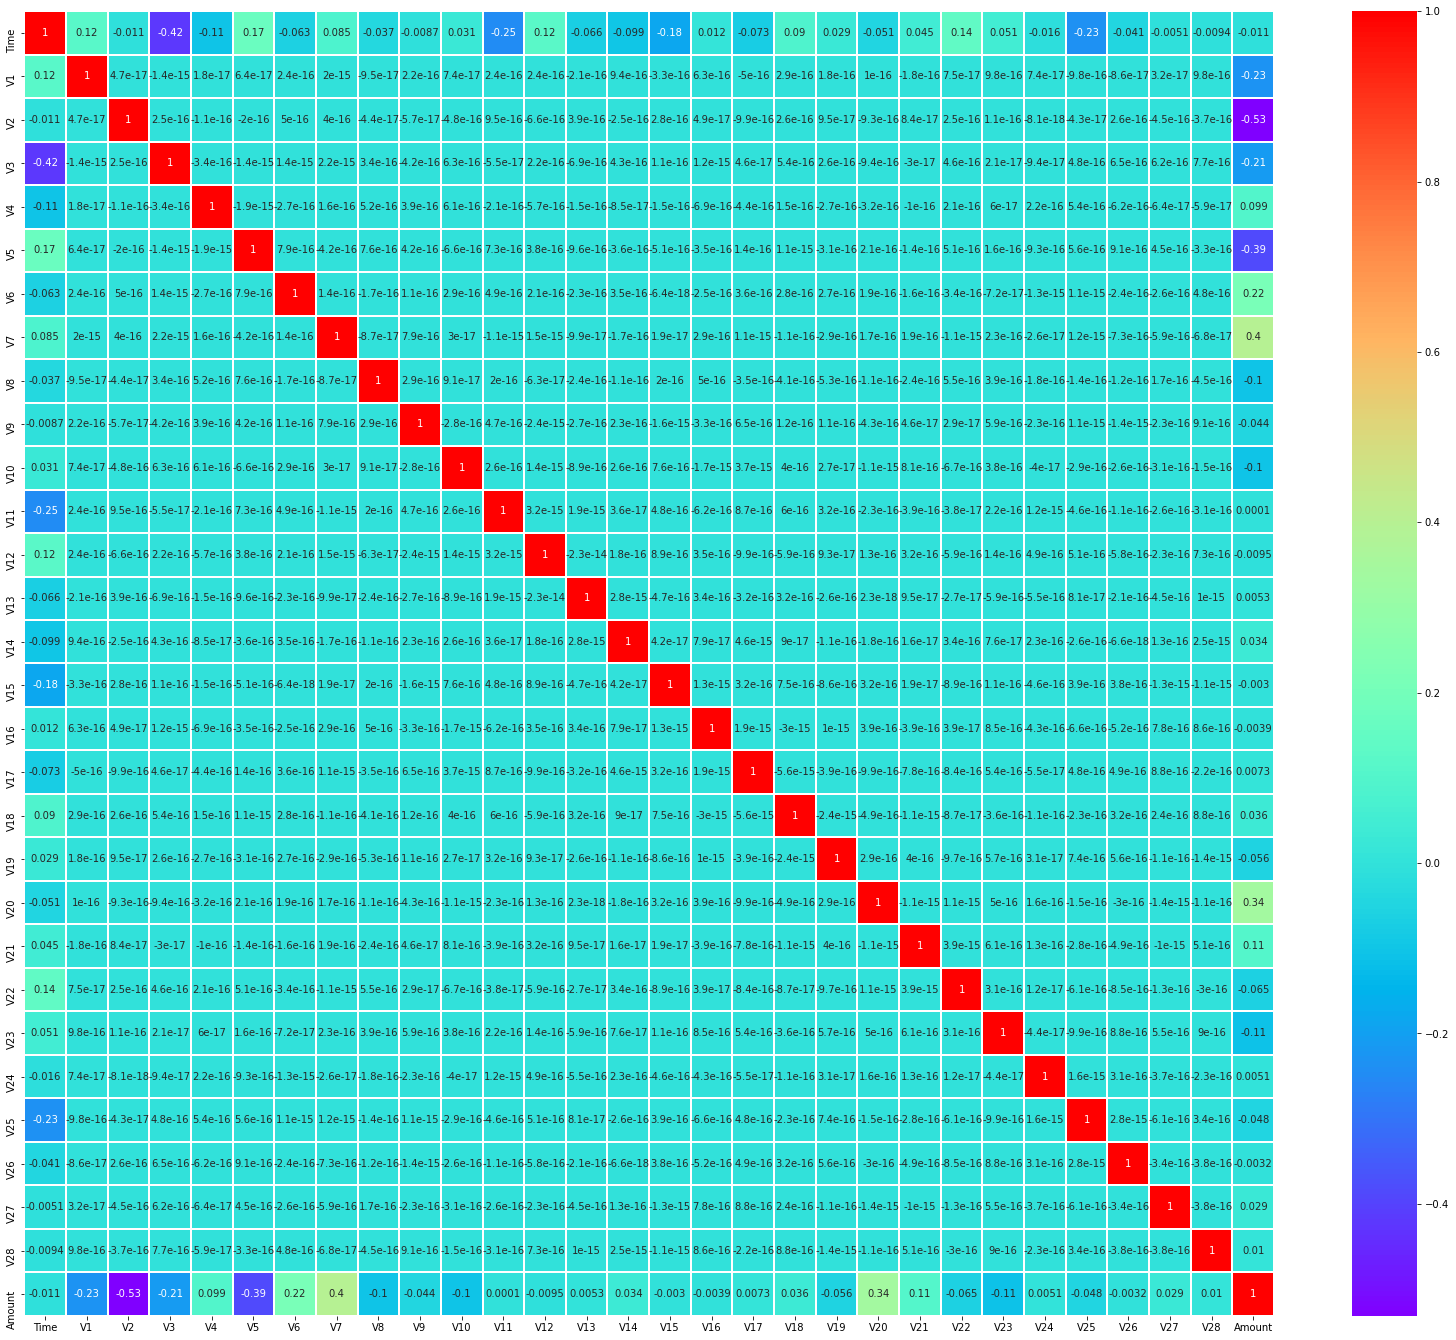

In [18]:
### Correlation plot
plt.figure(figsize=(28,24))
sns.heatmap(x.corr(), annot = True , cmap = 'rainbow',linecolor='white',linewidths=1)

In [19]:
### There is no  significant '-ve' or '+ve' correlation among the numerical variables because v1 to v28 variables are obtained from PCA

## Feature Engineering

In [20]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
x[['Time' , 'Amount']] = scale.fit_transform(x[['Time' , 'Amount']])

In [21]:
x.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-1.996583,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964
1,-1.996583,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475
2,-1.996562,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686
3,-1.996562,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534
4,-1.996541,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403


(array([10510., 16955., 38526., 38550., 40243., 10145., 17161., 38951.,
        40779., 32987.]),
 array([-1.99658302, -1.63271895, -1.26885487, -0.9049908 , -0.54112672,
        -0.17726264,  0.18660143,  0.55046551,  0.91432958,  1.27819366,
         1.64205773]),
 <a list of 10 Patch objects>)

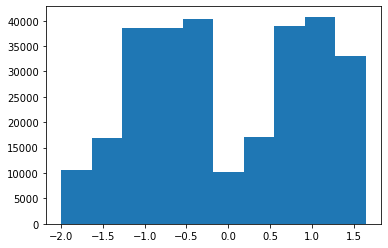

In [22]:
plt.hist(x['Time'])

(array([2.84395e+05, 3.60000e+02, 3.60000e+01, 1.00000e+01, 2.00000e+00,
        1.00000e+00, 0.00000e+00, 2.00000e+00, 0.00000e+00, 1.00000e+00]),
 array([ -0.35322939,   9.91831782,  20.18986503,  30.46141224,
         40.73295945,  51.00450666,  61.27605387,  71.54760108,
         81.81914829,  92.0906955 , 102.36224271]),
 <a list of 10 Patch objects>)

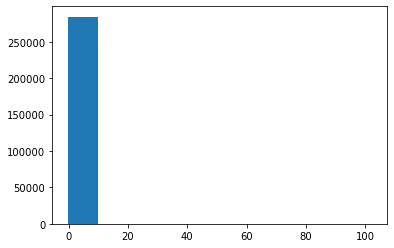

In [23]:
plt.hist(x['Amount'])

## Train Test Split

In [28]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

### RESAMPLING USING SMOTETomek

In [25]:
from imblearn.combine import SMOTETomek
os=SMOTETomek(0.75)
x_res,y_res=os.fit_sample(x_train,y_train)
from collections import Counter
print('Original dataset shape {}'.format(Counter(y_train)))
print('Resampled dataset shape {}'.format(Counter(y_res)))

Original dataset shape Counter({0: 199019, 1: 345})
Resampled dataset shape Counter({0: 199019, 1: 149264})


In [26]:
x_train

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
161145,0.402357,-0.132066,0.107044,-0.650588,-0.996032,1.814333,1.740740,0.496852,0.633016,0.017181,...,-0.062612,-0.062489,0.005292,0.251519,-2.466810,-0.889690,0.337462,0.306395,0.074817,-0.161761
204520,0.852954,2.125994,0.014207,-1.514760,0.115021,0.598510,-0.333235,0.199289,-0.264353,0.384111,...,-0.086076,-0.329368,-0.788150,0.267730,0.066122,-0.135785,0.203841,-0.068267,-0.057678,-0.345313
182659,0.646144,-0.086694,0.166240,1.573127,0.687266,0.222359,1.102606,1.575093,-1.098608,0.763887,...,0.052960,0.015324,1.063663,-0.410841,0.722723,-0.171733,-0.613543,-1.201571,-1.139931,0.326845
25117,-1.290721,1.352339,-0.534984,0.555143,-0.629355,-1.144170,-0.852967,-0.642128,-0.032659,-0.654482,...,-0.066712,-0.014814,-0.180379,0.178112,0.347720,0.151810,-0.404361,0.013746,0.016152,-0.329401
227642,1.060017,-1.526760,0.647782,0.615391,-0.561114,0.836950,-0.514251,0.984325,-0.097430,-0.062634,...,-0.073333,-0.221533,-0.393158,-0.214990,0.588447,0.679496,0.518434,0.065022,0.147294,0.006398
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211543,0.919076,-1.321976,1.138686,-0.940861,0.154160,0.109802,-0.538822,0.490058,0.513762,-0.493834,...,-0.436962,-0.012778,-0.237503,0.008713,-0.767844,-0.397162,0.316379,-0.463125,-0.010589,-0.153765
86293,-0.708533,-0.627810,0.918729,1.478453,0.213171,0.933695,1.261486,0.504752,0.404286,-0.939740,...,0.088281,-0.051356,-0.004245,0.090535,-0.964599,-0.522294,0.296733,0.145939,0.110400,-0.253317
122579,-0.383209,1.512602,-0.949435,-0.219062,-1.638850,-0.856348,-0.465996,-0.669193,-0.135566,-2.284345,...,-0.279028,-0.558803,-1.377240,0.080444,-0.579511,0.297851,-0.495367,-0.001415,0.003665,-0.213696
152315,0.051363,1.798863,-1.699791,-0.142182,-0.619533,-1.570248,0.083268,-1.501980,0.176287,1.755507,...,0.146098,0.181914,0.351358,0.115638,-0.566188,-0.596200,-0.295152,-0.033616,-0.032471,0.331683


### Model Building

In [69]:
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import cross_val_score  ,  cross_val_predict
from sklearn.metrics import roc_auc_score , roc_curve , auc , accuracy_score ,classification_report,confusion_matrix ,recall_score,precision_score,f1_score

## LogisticRegression

In [46]:
lr = LogisticRegression()
lr.fit(x_res , y_res)

LogisticRegression()

In [47]:
y1 = lr.predict(x_test)
print(confusion_matrix(y_test , y1))

[[83763  1533]
 [   13   134]]


In [74]:
print('accuracy_score is :{}'.format(accuracy_score(y_test , y1)))
print('roc_auc_score is :{}'.format(roc_auc_score(y_test,y1)))

print('precision_score is :{}'.format(precision_score(y_test,y1)))
print('recall_score is :{}'.format(recall_score(y_test,y1)))
print('f1_score is :{}'.format(f1_score(y_test,y1)))

print('\n' ,classification_report(y_test,y1))

accuracy_score is :0.9819060660323257
roc_auc_score is :0.9467959595205556
precision_score is :0.08038392321535692
recall_score is :0.9115646258503401
f1_score is :0.14773980154355015

               precision    recall  f1-score   support

           0       1.00      0.98      0.99     85296
           1       0.08      0.91      0.15       147

    accuracy                           0.98     85443
   macro avg       0.54      0.95      0.57     85443
weighted avg       1.00      0.98      0.99     85443



## GradientBoostingClassifier

In [60]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier(n_estimators=100)
gbc.fit(x_res,y_res)

GradientBoostingClassifier()

In [61]:
y_gbc = gbc.predict(x_test)
print(confusion_matrix(y_test , y_gbc))

[[84699   597]
 [   17   130]]


In [73]:
print('accuracy_score is :{}'.format(accuracy_score(y_test , y_gbc)))
print('roc_auc_score is :{}'.format(roc_auc_score(y_test,y_gbc)))

print('precision_score is :{}'.format(precision_score(y_test,y_gbc)))
print('recall_score is :{}'.format(recall_score(y_test,y_gbc)))
print('f1_score is :{}'.format(f1_score(y_test,y_gbc)))

print('\n' ,classification_report(y_test,y_gbc))

accuracy_score is :0.9928139227321138
roc_auc_score is :0.9386772928079504
precision_score is :0.17881705639614856
recall_score is :0.8843537414965986
f1_score is :0.2974828375286041

               precision    recall  f1-score   support

           0       1.00      0.99      1.00     85296
           1       0.18      0.88      0.30       147

    accuracy                           0.99     85443
   macro avg       0.59      0.94      0.65     85443
weighted avg       1.00      0.99      1.00     85443



## RandomForestClassifier

In [63]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators= 100 ,  criterion= 'gini')
rfc.fit(x_res , y_res)

RandomForestClassifier()

In [64]:
y_pred = rfc.predict(x_test)
print(confusion_matrix(y_test , y_pred))

[[85285    11]
 [   26   121]]


In [76]:
print('accuracy_score is :{}'.format(accuracy_score(y_test , y_pred)))
print('\nroc_auc_score is :{}'.format(roc_auc_score(y_test,y_pred)))

print('precision_score is :{}'.format(precision_score(y_test,y_pred)))
print('recall_score is :{}'.format(recall_score(y_test,y_pred)))
print('f1_score is :{}'.format(f1_score(y_test,y_pred)))

print('\n' ,classification_report(y_test,y_pred))

accuracy_score is :0.9995669627705019

roc_auc_score is :0.9115001445147558
precision_score is :0.9166666666666666
recall_score is :0.8231292517006803
f1_score is :0.8673835125448027

               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85296
           1       0.92      0.82      0.87       147

    accuracy                           1.00     85443
   macro avg       0.96      0.91      0.93     85443
weighted avg       1.00      1.00      1.00     85443



## Cross Validation

In [80]:
## with test data
acc_score_rf = cross_val_score(estimator = RandomForestClassifier() , X = x_test ,y = y_test , cv = 5 , scoring = 'accuracy')
print('\n' , acc_score_rf.mean())


 0.9993797035644849


## XGBClassifier

In [66]:
from xgboost import XGBClassifier
xgb = XGBClassifier(n_estimators=100, learning_rate=0.2)
xgb.fit(x_res , y_res)

[17:48:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.2, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [71]:
y_pred_x = xgb.predict(x_test)
print(confusion_matrix(y_test , y_pred_x  ))

[[85243    53]
 [   26   121]]


In [79]:
print('accuracy_score is :{}'.format(accuracy_score(y_test , y_pred_x)))
print('\nroc_auc_score is :{}'.format(roc_auc_score(y_test,y_pred_x)))

print('precision_score is :{}'.format(precision_score(y_test,y_pred_x)))
print('recall_score is :{}'.format(recall_score(y_test,y_pred_x)))
print('f1_score is :{}'.format(f1_score(y_test,y_pred_x)))

print('\n' ,classification_report(y_test,y_pred_x))

accuracy_score is :0.9990754069964772

roc_auc_score is :0.9112539430516158
precision_score is :0.6954022988505747
recall_score is :0.8231292517006803
f1_score is :0.7538940809968847

               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85296
           1       0.70      0.82      0.75       147

    accuracy                           1.00     85443
   macro avg       0.85      0.91      0.88     85443
weighted avg       1.00      1.00      1.00     85443



## Cross Validation

In [77]:
## with test data
acc_score_xgb = cross_val_score(estimator = XGBClassifier() , X = x_test ,y = y_test , cv = 5 , scoring = 'accuracy')
print(acc_score_xgb.mean())

[18:07:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:07:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:07:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:08:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

## Random Forest performed well among all other algorithms

In [ ]:
## plotting roc curve with random forest

In [92]:
#log_reg_pred = cross_val_predict(log_reg, xtest, ytest, cv=5,method="decision_function")

In [97]:
fpr,tpr,threshold= roc_curve(y_test,y_pred)

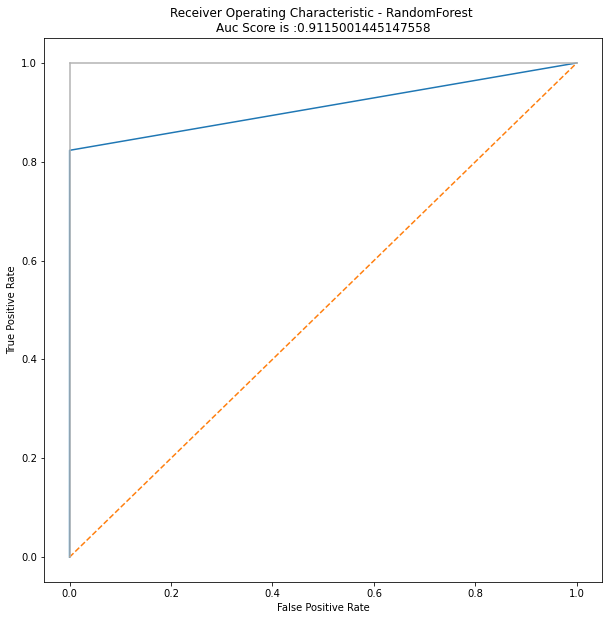

In [102]:
plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic - RandomForest \nAuc Score is :'+str(auc(fpr,tpr)))
plt.plot(fpr,tpr)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Conclusion:

### Random forest algorithm produces less type 1 and type 2 error , hence this is a good model